# Sprint18
## データセット作成

In [1]:
import numpy  as np
import os
import glob 
import re
import random
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from urllib.request import urlopen

import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image,load_img, save_img, img_to_array, array_to_img

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

In [2]:
#画像パス指定
path='./image_file/'

In [3]:
#osを使用する場合
flist=os.listdir(path)
flist
#隠しファイル無視
flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat001.jpeg',
 'dog001.jpeg',
 'dog005.jpeg',
 'cat005.jpeg',
 'cat004.jpeg',
 'dog004.jpeg',
 'dog003.jpeg',
 'cat003.jpeg',
 'cat002.jpeg',
 'dog002.jpeg']

In [4]:
#globを使用する場合
img_list = glob.glob(path + "/*.jpeg")
img_list

['./image_file/cat001.jpeg',
 './image_file/dog001.jpeg',
 './image_file/dog005.jpeg',
 './image_file/cat005.jpeg',
 './image_file/cat004.jpeg',
 './image_file/dog004.jpeg',
 './image_file/dog003.jpeg',
 './image_file/cat003.jpeg',
 './image_file/cat002.jpeg',
 './image_file/dog002.jpeg']

(224, 224, 3)


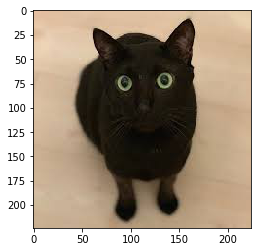

In [5]:
cat_img = Image.open(img_list[7])

#サイズを揃える
cat_img=cat_img.resize((224,224))
cat_img=np.array(cat_img)

print(cat_img.shape)
plt.imshow(cat_img)

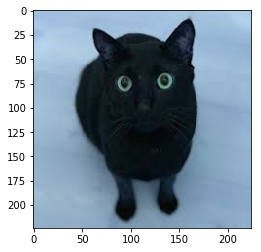

In [6]:
#cv2でそのまま表示（BGR）
img=cv2.imread(img_list[7])
#cv2でリサイズ
img=cv2.resize(img,(224,224))
plt.imshow(img)

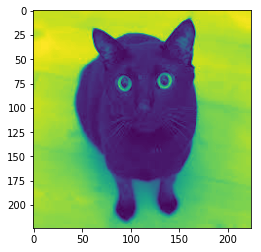

In [7]:
# 第二引数を0にするとグレースケールで読み込めるらしいがBGRのためネガっぽくなる
img=cv2.imread(img_list[7],0)
#cv2でリサイズ
img=cv2.resize(img,(224,224))
plt.imshow(img)

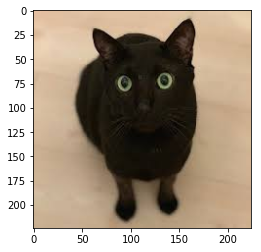

In [8]:
#BGRからRGBへ変換
img = cv2.imread(img_list[7])
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# RGB
plt.imshow(img_rgb)

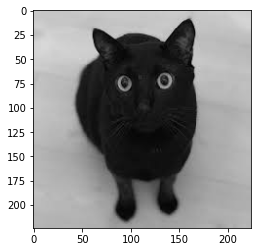

In [9]:
#RGBで第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[7],0)
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# RGB
plt.imshow(img_rgb)

In [10]:
print(img_list)

['./image_file/cat001.jpeg', './image_file/dog001.jpeg', './image_file/dog005.jpeg', './image_file/cat005.jpeg', './image_file/cat004.jpeg', './image_file/dog004.jpeg', './image_file/dog003.jpeg', './image_file/cat003.jpeg', './image_file/cat002.jpeg', './image_file/dog002.jpeg']


## イメージのロード、配列化、リサイズ、データセット作成

In [62]:
d_img_array = np.empty((0,224,224,3))

for img in img_list:
    d_img = Image.open(img)
    d_img = d_img.resize((224, 224))
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1,224,224,3))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)
print(d_img_array.shape)
X = d_img_array

(10, 224, 224, 3)


In [94]:
Y = []
for img in img_list:
    if re.search("dog" , img):
        label = 0
        Y.append(label)
    if re.search("cat" , img):
        label = 1
        Y.append(label)
Y

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0]

In [63]:
path2 = "./test"
img_list2 = glob.glob(path2 + '/*' + ".jpg")
img_list2

['./test/cat_1.jpg',
 './test/cat_2.jpg',
 './test/cat_3.jpg',
 './test/cat_6.jpg',
 './test/dog_6.jpg',
 './test/dog_1.jpg',
 './test/dog_3.jpg']

In [73]:
t_img_array = np.empty((0,224,224,3))

for img in img_list2:
    t_img = Image.open(img)
    t_img = t_img.resize((224, 224))
    t_img = np.array(d_img)
    t_img = t_img / 255.0
    t_img = t_img.reshape((1,224,224,3))
    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)
print(t_img_array.shape)
X_test = t_img_array

(7, 224, 224, 3)


In [95]:
y_test = []
for img in img_list2:
    if re.search("dog" , img):
        label = 0
        y_test.append(label)
    if re.search("cat" , img):
        label = 1
        y_test.append(label)
y_test

[1, 1, 1, 1, 0, 0, 0]

dog_image:(10, 224, 224, 3)


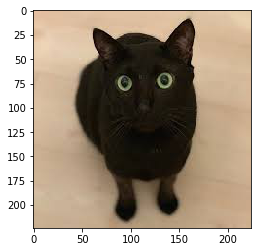

In [64]:
print('dog_image:{}'.format(d_img_array.shape))
plt.imshow(d_img_array[7])

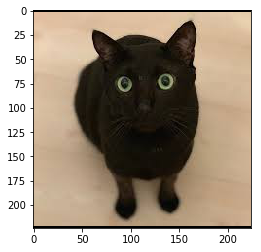

In [66]:
'''
画像の中心を切り出し
https://note.nkmk.me/python-pillow-image-crop-trimming/
'''

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

img = Image.open(img_list[7])
img_new = crop_center(img, 224, 224)
plt.imshow(img_new)

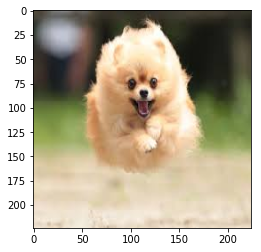

In [67]:
img = cv2.imread(img_list[6])
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# RGB
plt.imshow(img_rgb)

## 【問題1】自作データセットでの分類の学習

## kerasで自作する

In [92]:
K.clear_session()
model=Sequential()
model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,  activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
opt = optimizers.Adam(lr=0.001)

model.summary()
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history=model.fit(X, Y,batch_size = 32, epochs = 10, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               19360200  
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)              

In [85]:
y_pred=np.round(model.predict(X_test))
print('preds.shape: {}'.format(y_pred.shape))  

preds.shape: (7, 1)


In [86]:
y_test

[0, 0, 0, 0, 1, 1, 1]

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 4],
       [0, 3]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.42857142857142855

## 【問題2】分類データセットに対するデータ拡張

In [16]:
import albumentations as albu

In [98]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

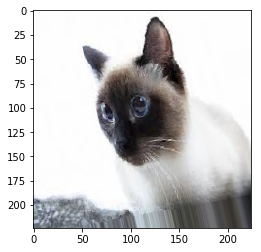

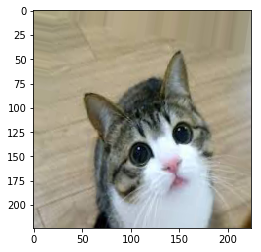

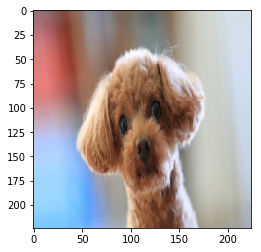

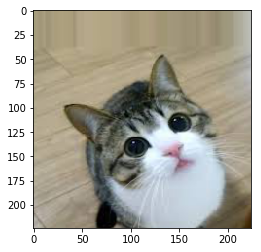

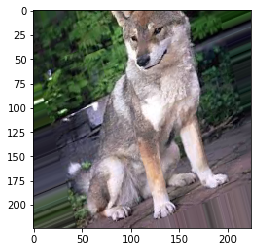

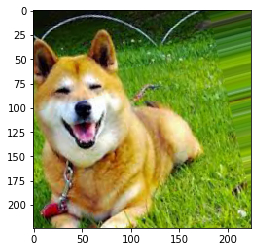

In [99]:
g = datagen.flow(X, batch_size=10)
 
for i in range(6):
    batches = g.next()
    plt.figure(i)
    
    # ４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
    plt.imshow(gen_img)
 

In [84]:
datagen.fit(X)

In [85]:
model.fit_generator(datagen.flow(X,y,batch_size=10),
                    steps_per_epoch=len(X)/10, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 7.6666 - accuracy: 0.5000


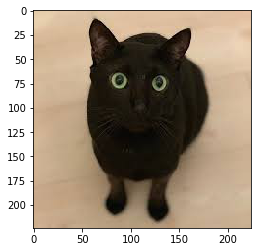

In [66]:
#左右反転してみる
img=albu.HorizontalFlip(p=1)(image=X[8])['image']

plt.figure(figsize=(4,4))
plt.imshow(img);

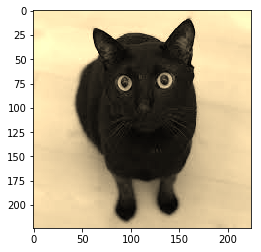

In [71]:
#セピア調に
img=albu.ToSepia(p=1)(image=X[8])['image']
plt.figure(figsize=(4,4))
plt.imshow(img);

In [13]:
def data_aug(img_list):
    """
    データの拡張を行う関数
    データのパスを受け取り、変化させた画像をnp.arrayの形で返す
    """
    result_array = np.empty((0, 224,224,3))
    
    hori = HorizontalFlip(p=1)
    blur = Blur()
    shift = RGBShift()
    rota = ShiftScaleRotate()
    
    
    for img in img_list:
        image = cv2.imread(img)
        image = cv2.resize(image, (224,224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_original = (image / 225.0).reshape(1, 224 ,224 , 3)
        image_hori = (hori(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_blur = (blur(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_shift = (shift(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_rota = (rota(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        
        result_array = np.concatenate([result_array, image_original, image_hori, image_blur, image_shift, image_rota], axis=0)
        
    return result_array

In [14]:
X_aug = data_aug(img_list)
X_aug.shape

(50, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


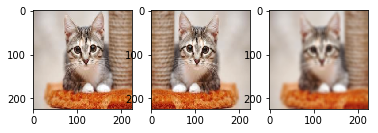

In [23]:
plt.subplot(1, 3, 1)
plt.imshow(X_aug[0])

plt.subplot(1, 3, 2)
plt.imshow(X_aug[1])

plt.subplot(1, 3, 3)
plt.imshow(X_aug[2])

plt.show()

In [97]:
for img in img_list:
    if re.search("dog" , img):
        dog = Image.open(img)
    if re.search("cat" , img):
        cat = Image.open(img)

In [98]:
#入力ディレクトリを作成
input_dir = "cat.font"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [99]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 1
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()

In [100]:
path = "image_out"
flist = os.listdir(path)
len(flist)

0

## 【問題3】物体検出データセットの用意

In [25]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [26]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [27]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

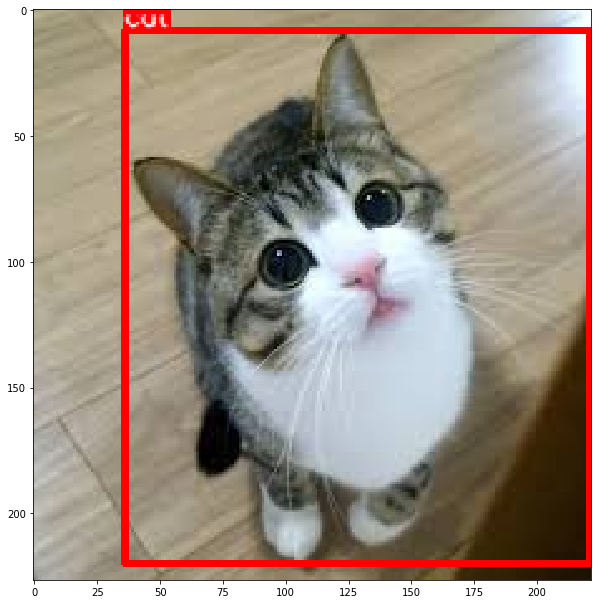

In [9]:
image = download_image('image_file/cat004.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[36,8,221,220]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("image_list/cat1_img.jpeg")

## 【問題4】物体検出データセットに対するデータ拡張
アドバンス問題とのことでスキップ